In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
df_babynames = pd.read_csv('babynames.csv')
df_babynames.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


### Data Preprocessing

In [41]:
bins = list(range(1880, 2025, 10))
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df_babynames['decade'] = pd.cut(df_babynames['year'], bins=bins, labels=labels, right=False)

### Descriptive Analysis and Visualization

In [42]:
df_namesbydecade = df_babynames.groupby(['decade', 'sex', 'name'])['n'].sum().reset_index()

In [43]:
df_namesbydecade.groupby(['decade', 'sex']).apply(lambda x: x.nlargest(5, 'n')).reset_index(drop=True)

,decade,sex,name,n
0,1880-1889,F,Mary,91668
1,1880-1889,F,Anna,38159
2,1880-1889,F,Emma,25404
3,1880-1889,F,Elizabeth,25006
4,1880-1889,F,Margaret,21799
...,...,...,...,...
135,2010-2019,M,Noah,145195
136,2010-2019,M,Jacob,140091
137,2010-2019,M,Mason,133535
138,2010-2019,M,Liam,133019


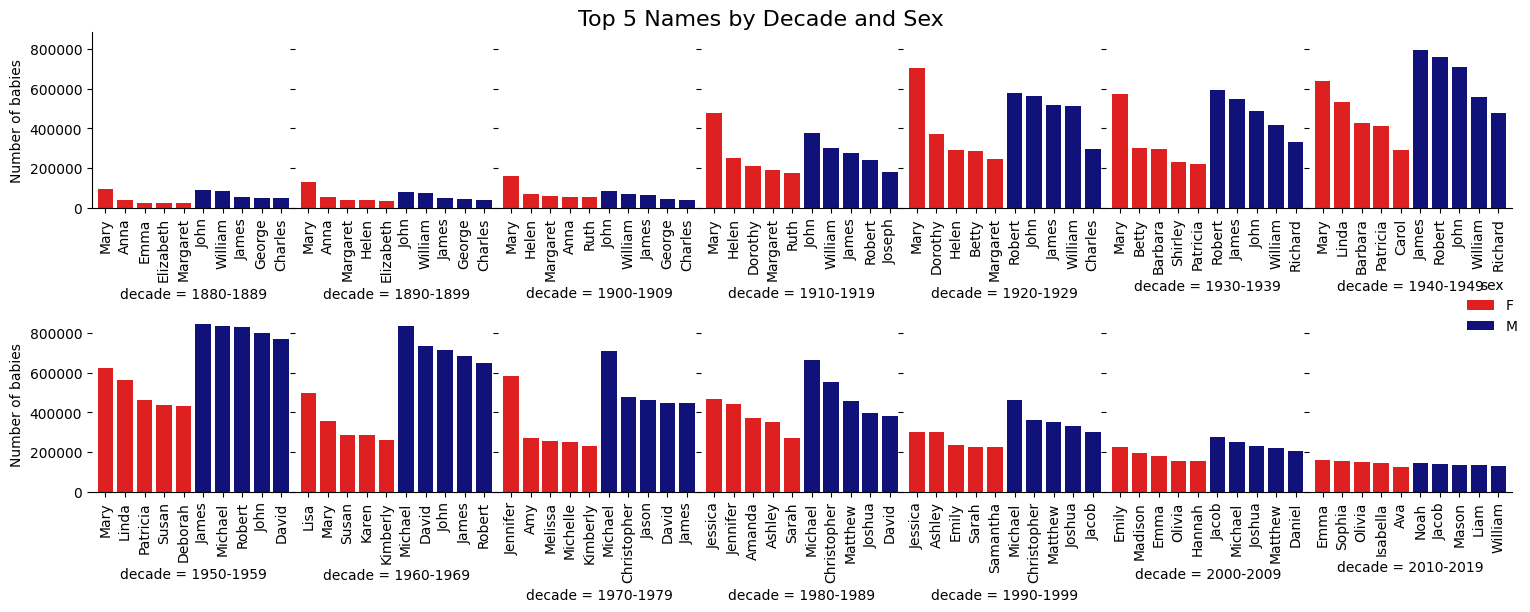

In [44]:
df_top10bydecade = df_namesbydecade.groupby(['decade', 'sex']).apply(lambda x: x.nlargest(5, 'n')).reset_index(drop=True)
df_top10bydecade.rename(columns={'n': 'Number of babies'}, inplace=True)
g = sns.catplot(x="name", y="Number of babies", col="decade",
                hue="sex",palette={'M': 'darkblue', 'F': 'red'},
                data=df_top10bydecade,
                kind="bar", height=3, aspect=.7,
                col_wrap=7, sharex=False)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:

    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.03)
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.suptitle('Top 5 Names by Decade and Sex', fontsize=16, va='bottom')
plt.show()

#### Correlation

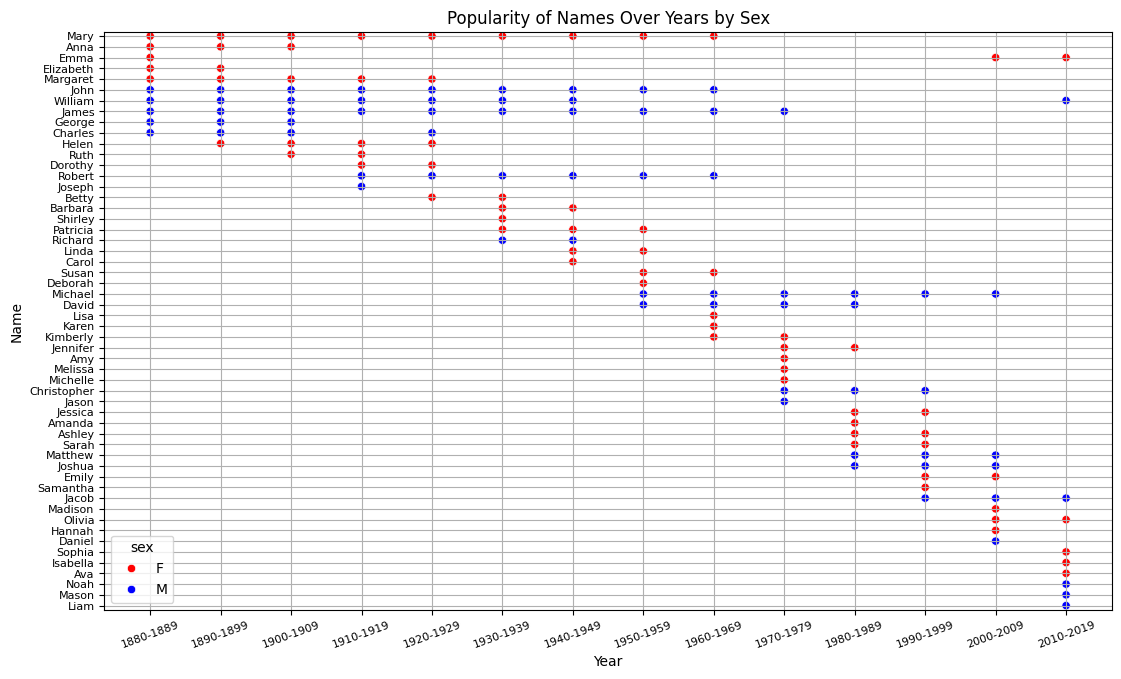

In [45]:
plt.figure(figsize=(13, 7.5))
scatter = sns.scatterplot(
    data=df_top10bydecade,
    x='decade',
    y='name',
    hue='sex',
    palette={'M': 'blue', 'F': 'red'},
    sizes=(20, 200),
    legend='brief',
)

plt.title('Popularity of Names Over Years by Sex')
plt.xlabel('Year')
plt.ylabel('Name')
plt.grid(True)
plt.gca().margins(y=0.007)
plt.xticks(rotation=20)
plt.tick_params(axis='y', labelsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()


In [46]:
df_namediversity = df_babynames.groupby(['year', 'sex'])['name'].nunique().reset_index()

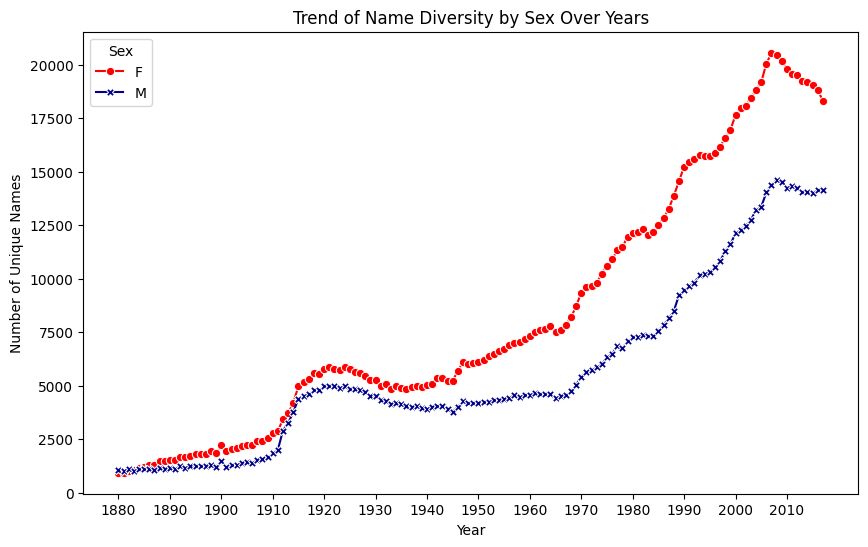

In [47]:
df_namediversity.rename(columns={'name': 'unique_names_count'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_namediversity, x='year', y='unique_names_count',
             hue='sex', palette={'M': 'darkblue', 'F': 'red'},
             style='sex', markers=True, dashes=False)
plt.title('Trend of Name Diversity by Sex Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Unique Names')
plt.xticks(range(min(df_namediversity['year']), max(df_namediversity['year']) + 1, 10))
plt.legend(title='Sex')
plt.show()

In [48]:
df_namediversity['decade'] = pd.cut(df_namediversity['year'], bins=bins, labels=labels, right=False)

In [49]:
df_namediversity_decade = df_namediversity.groupby(['decade', 'sex'])['unique_names_count'].sum().reset_index()
df_namediversity_decade[df_namediversity_decade['sex']=='M'].set_index('decade').T

decade,1880-1889,1890-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019
sex,M,M,M,M,M,M,M,M,M,M,M,M,M,M
unique_names_count,10871,12191,14383,36913,48591,41710,40402,43852,46364,62223,77877,103939,133792,113264


In [50]:
df_namediversity_decade[df_namediversity_decade['sex']=='F'].set_index('decade').T

decade,1880-1889,1890-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019
sex,F,F,F,F,F,F,F,F,F,F,F,F,F,F
unique_names_count,11872,17331,22292,43602,56769,49777,55238,66668,77809,104963,127907,159196,191388,153481


In [51]:
df_male = df_namediversity_decade[df_namediversity_decade['sex']=='M'].set_index('decade').drop('sex',axis=1).rename(columns={'unique_names_count': 'male_unique_names'}).T
df_female = df_namediversity_decade[df_namediversity_decade['sex']=='F'].set_index('decade').drop('sex',axis=1).rename(columns={'unique_names_count': 'female_unique_names'}).T

df_merged = pd.concat([df_male, df_female], axis=0)
df_merged.head()

decade,1880-1889,1890-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019
male_unique_names,10871,12191,14383,36913,48591,41710,40402,43852,46364,62223,77877,103939,133792,113264
female_unique_names,11872,17331,22292,43602,56769,49777,55238,66668,77809,104963,127907,159196,191388,153481


### Models

$$
P(\text{year} \mid \text{name}, \text{sex}) = \frac{P(\text{name}, \text{sex} \mid \text{year}) \times P(\text{year})}{P(\text{name}, \text{sex})}
$$


$$
P(\text{age} \mid \text{name}, \text{sex}) = P(\text{2024-year} \mid \text{name}, \text{sex}) = \frac{P(\text{name}, \text{sex} \mid \text{2024-year}) \times P(\text{2024-year})}{P(\text{name}, \text{sex})}
$$


In [52]:
df_babynames.head()

,year,sex,name,n,prop,decade
0,1880,F,Mary,7065,0.072384,1880-1889
1,1880,F,Anna,2604,0.026679,1880-1889
2,1880,F,Emma,2003,0.020521,1880-1889
3,1880,F,Elizabeth,1939,0.019866,1880-1889
4,1880,F,Minnie,1746,0.017888,1880-1889


         year  estimated_age  p_age_given_name_sex
180210   1921            103              0.017943
212466   1924            100              0.017834
191067   1922            102              0.017505
431065   1947             77              0.017386
201823   1923            101              0.017374
...       ...            ...                   ...
1793010  2014             10              0.000638
1826241  2015              9              0.000636
1726010  2012             12              0.000624
1859343  2016              8              0.000607
1892321  2017              7              0.000577

[138 rows x 3 columns]


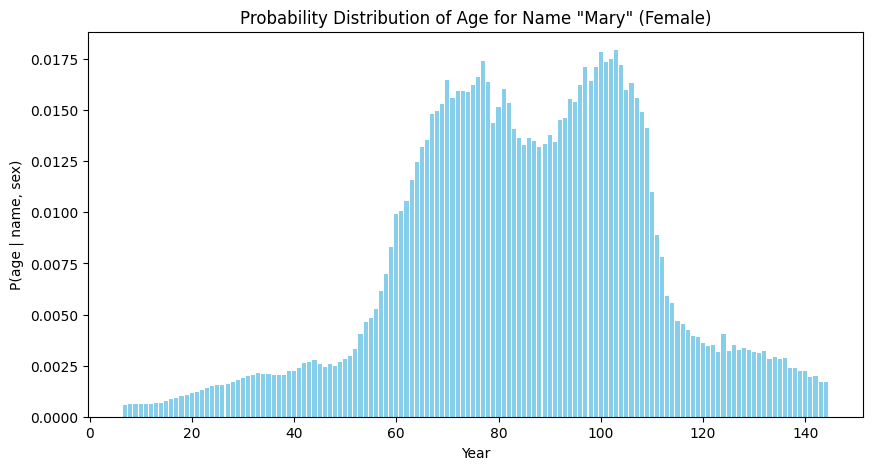

In [53]:
total_counts = df_babynames['n'].sum()
df_babynames['p_name_sex'] = df_babynames.groupby(['name', 'sex'])['n'].transform('sum') / total_counts
df_babynames['p_birth_year'] = df_babynames.groupby('year')['n'].transform('sum') / total_counts
df_babynames['p_name_sex_given_birth_year'] = df_babynames['n'] / df_babynames.groupby('year')['n'].transform('sum')

def calculate_all_age_probabilities(name, sex, current_year=2024):
    subset = df_babynames[(df_babynames['name'] == name) & (df_babynames['sex'] == sex)]
    if subset.empty:
        return "No data available for this name and sex."

    subset['p_age_given_name_sex'] = (subset['p_name_sex_given_birth_year'] * subset['p_birth_year']) / subset['p_name_sex']
    subset['estimated_age'] = current_year - subset['year']
    return subset[['year', 'estimated_age', 'p_age_given_name_sex']]

result = calculate_all_age_probabilities("Mary", "F")

print(result.sort_values(by='p_age_given_name_sex', ascending=False))
plt.figure(figsize=(10, 5))
plt.bar(2024-result['year'], result['p_age_given_name_sex'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('P(age | name, sex)')
plt.title('Probability Distribution of Age for Name "Mary" (Female)')
plt.gca()
plt.show()


In [54]:
result.sort_values(by='p_age_given_name_sex', ascending=False)

,year,estimated_age,p_age_given_name_sex
180210,1921,103,0.017943
212466,1924,100,0.017834
191067,1922,102,0.017505
431065,1947,77,0.017386
201823,1923,101,0.017374
...,...,...,...
1793010,2014,10,0.000638
1826241,2015,9,0.000636
1726010,2012,12,0.000624
1859343,2016,8,0.000607


$$
P(\text{name}, \text{sex}) = \frac{\text{Total number of occurrences of each (name, sex)}}{\text{Total number of all births}}
$$


$$
P(\text{birth year} = y) = \frac{\text{Total number of births in year } y}{\text{Total number of all births}}
$$


$$
P(\text{name}, \text{sex} \mid \text{birth year} = y) = \frac{\text{Number of occurrences of each (name, sex) in year } y}{\text{Total number of births in year } y}
$$


        year  estimated_age  p_age_given_name_sex
579828  1960             64              0.058945
567925  1959             65              0.058695
591947  1961             63              0.057051
556233  1958             66              0.052726
604185  1962             62              0.051508
...      ...            ...                   ...
7285    1883            141              0.000357
21817   1889            135              0.000352
32877   1893            131              0.000328
27166   1891            133              0.000313
3168    1881            143              0.000215

[138 rows x 3 columns]


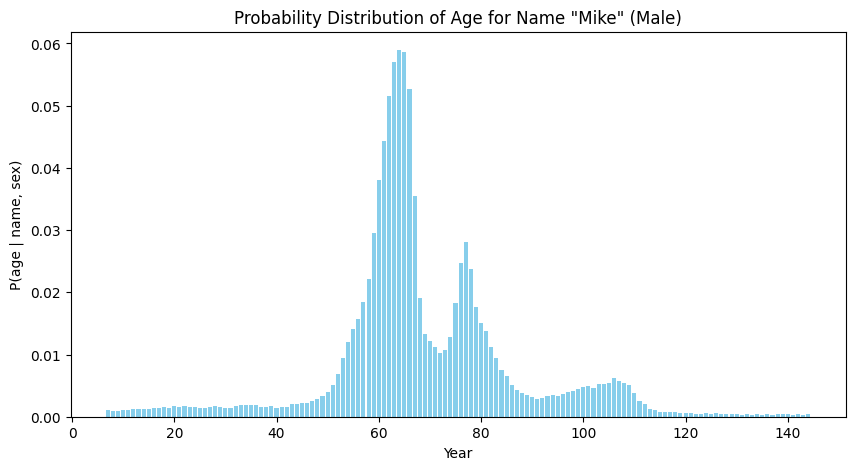

In [55]:
result = calculate_all_age_probabilities("Mike", "M")

print(result.sort_values(by='p_age_given_name_sex', ascending=False))
plt.figure(figsize=(10, 5))
plt.bar(2024-result['year'], result['p_age_given_name_sex'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('P(age | name, sex)')
plt.title('Probability Distribution of Age for Name "Mike" (Male)')
plt.gca()
plt.show()

In [56]:
result.sort_values(by='p_age_given_name_sex', ascending=False)

,year,estimated_age,p_age_given_name_sex
579828,1960,64,0.058945
567925,1959,65,0.058695
591947,1961,63,0.057051
556233,1958,66,0.052726
604185,1962,62,0.051508
...,...,...,...
7285,1883,141,0.000357
21817,1889,135,0.000352
32877,1893,131,0.000328
27166,1891,133,0.000313
